## Video games sales analysis

### Data ["Website"](https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset/data)

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://previews.123rf.com/images/redlinevector/redlinevector1903/redlinevector190300644/119546618-video-games-neon-text-and-gamepad-with-lightnings-video-game-and-entertainment-design-night-bright.jpg")

In [3]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
pd.options.mode.chained_assignment = None

Metadata

In [4]:
# Importing Data

filepathx="Xbox One.csv"
xdf=pd.read_csv(filepathx,delimiter=",",encoding="latin1")

filepathp="PS4.csv"
pdf=pd.read_csv(filepathp,delimiter=",",encoding="latin1")

### 1. Exploring Data

In [5]:
xdf.head()

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43


In [6]:
xdf.shape
f"{xdf.shape[0]} Rows by {xdf.shape[1]} Columns"

'613 Rows by 10 Columns'

In [7]:
pdf.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [8]:
pdf.shape
f"{pdf.shape[0]} Rows by {pdf.shape[1]} Columns"

'1034 Rows by 9 Columns'

### 2. Cleaning up the Data!

#### Cleaning xbox data

In [9]:
xdf

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
...,...,...,...,...,...,...,...,...,...,...
608,609,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
609,610,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
610,611,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
611,612,Outcast: Second Contact,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00


In [10]:
xdf.rename(columns=str.lower,inplace=True)
xdf.sample()

,pos,game,year,genre,publisher,north america,europe,japan,rest of world,global
225,226,Pro Evolution Soccer 2015,2014.0,Sports,Konami Digital Entertainment,0.04,0.1,0.0,0.01,0.15


In [11]:
xdf.columns=xdf.columns.str.replace(" ","_")
xdf.sample()

,pos,game,year,genre,publisher,north_america,europe,japan,rest_of_world,global
386,387,The Dwarves,2016.0,Role-Playing,THQ Nordic,0.02,0.0,0.0,0.0,0.02


In [12]:
xdf=xdf.dropna()

In [13]:
xdf["year"]=pd.to_numeric(xdf["year"]).astype(int)
xdf.sample()

,pos,game,year,genre,publisher,north_america,europe,japan,rest_of_world,global
32,33,FIFA 15,2014,Sports,EA Sports,0.64,1.39,0.0,0.16,2.19


In [14]:
xdf.drop(["pos"],axis=1,inplace=True)

In [15]:
xdf=xdf.rename(columns=({"global":"total"}))
xdf.sample()

,game,year,genre,publisher,north_america,europe,japan,rest_of_world,total
491,WonderFlick,2014,Misc,Level 5,0.0,0.0,0.0,0.0,0.0


#### Cleaning Play Station Data

In [16]:
pdf

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [17]:
pdf.rename(columns=str.lower,inplace=True)
pdf


,game,year,genre,publisher,north america,europe,japan,rest of world,global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [18]:
pdf.columns=pdf.columns.str.replace(" ","_")
pdf.sample()

,game,year,genre,publisher,north_america,europe,japan,rest_of_world,global
676,Pharaonic,2017.0,Action,Soedesco,0.01,0.0,0.0,0.0,0.02


In [19]:
pdf.isnull().sum()

game               0
year             209
genre              0
publisher        209
north_america      0
europe             0
japan              0
rest_of_world      0
global             0
dtype: int64

In [20]:
filter=pdf.publisher.isnull()
pdf.loc[filter]

,game,year,genre,publisher,north_america,europe,japan,rest_of_world,global
447,Ultra Street Fighter IV,NaN,Fighting,NaN,0.0,0.08,0.00,0.01,0.10
466,Dragon's Dogma Online,NaN,Role-Playing,NaN,0.0,0.00,0.09,0.00,0.09
630,This War of Mine,NaN,Action,NaN,0.0,0.02,0.00,0.00,0.03
724,A Boy and His Blob,NaN,Platform,NaN,0.0,0.00,0.00,0.00,0.00
727,Another World,NaN,Adventure,NaN,0.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
1019,Sakuna: Of Rice and Ruin,NaN,Action,NaN,0.0,0.00,0.00,0.00,0.00
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.0,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.0,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.0,0.00,0.00,0.00,0.00


In [21]:
pdf=pdf.dropna()

In [22]:
pdf["year"]=pd.to_numeric(pdf["year"]).astype(int)
pdf.sample()

,game,year,genre,publisher,north_america,europe,japan,rest_of_world,global
679,Let It Die,2017,Action,GungHo,0.0,0.01,0.01,0.0,0.01


In [23]:
pdf=pdf.rename(columns=({"global":"total"}))
pdf.sample()

,game,year,genre,publisher,north_america,europe,japan,rest_of_world,total
694,ATV Renegades,2017,Racing,Nighthawk Interactive,0.01,0.0,0.0,0.0,0.01


#### Merging Tables

In [24]:
games_df=pd.merge(left=xdf,right=pdf,on="game",suffixes=("_xbox","_ps"))
games_df

,game,year_xbox,genre_xbox,publisher_xbox,north_america_xbox,europe_xbox,japan_xbox,rest_of_world_xbox,total_xbox,year_ps,genre_ps,publisher_ps,north_america_ps,europe_ps,japan_ps,rest_of_world_ps,total_ps
0,Grand Theft Auto V,2014,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,4.63,2.04,0.02,0.68,7.37,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Call of Duty: WWII,2017,Shooter,Activision,3.75,1.91,0.00,0.57,6.23,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
3,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
4,MineCraft,2014,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43,2014,Misc,Sony Computer Entertainment,1.89,3.13,0.35,0.96,6.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,Biomutant,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,2018,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
448,Biomutant,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
449,de Blob,2017,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,2017,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
450,Outcast: Second Contact,2017,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00,2017,Adventure,Maximum Games,0.05,0.00,0.00,0.01,0.06


In [25]:
games_df=games_df.assign(total=lambda x:(x["total_xbox"]+x["total_ps"]))
games_df

,game,year_xbox,genre_xbox,publisher_xbox,north_america_xbox,europe_xbox,japan_xbox,rest_of_world_xbox,total_xbox,year_ps,genre_ps,publisher_ps,north_america_ps,europe_ps,japan_ps,rest_of_world_ps,total_ps,total
0,Grand Theft Auto V,2014,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,28.11
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,4.63,2.04,0.02,0.68,7.37,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,22.46
2,Call of Duty: WWII,2017,Shooter,Activision,3.75,1.91,0.00,0.57,6.23,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,19.63
3,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,19.71
4,MineCraft,2014,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43,2014,Misc,Sony Computer Entertainment,1.89,3.13,0.35,0.96,6.33,11.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,Biomutant,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,2018,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,0.00
448,Biomutant,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,0.00
449,de Blob,2017,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,2017,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,0.00
450,Outcast: Second Contact,2017,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00,2017,Adventure,Maximum Games,0.05,0.00,0.00,0.01,0.06,0.06


In [26]:
games_df.drop(["total_xbox","total_ps","year_ps","genre_ps","publisher_ps"],axis=1,inplace=True)
games_df.sample()

,game,year_xbox,genre_xbox,publisher_xbox,north_america_xbox,europe_xbox,japan_xbox,rest_of_world_xbox,north_america_ps,europe_ps,japan_ps,rest_of_world_ps,total
237,Yooka-Laylee,2017,Platform,Sold Out,0.05,0.04,0.0,0.01,0.09,0.16,0.0,0.05,0.39


In [27]:
games_df=games_df.rename(columns=({"year_xbox":"year","genre_xbox":"genre","publisher_xbox":"publisher"}))
games_df.sample()

,game,year,genre,publisher,north_america_xbox,europe_xbox,japan_xbox,rest_of_world_xbox,north_america_ps,europe_ps,japan_ps,rest_of_world_ps,total
346,Broken Sword 5: The Serpent's Curse,2015,Adventure,Revolution Software,0.0,0.02,0.0,0.0,0.0,0.06,0.0,0.01,0.09


### 3. Analyse Data

In [28]:
# Making copies

xbox=xdf.copy()
play=pdf.copy()
games=games_df.copy()

#### 3.1 Top 10: Xbox selling games.

In [29]:
xbox.sample()

,game,year,genre,publisher,north_america,europe,japan,rest_of_world,total
551,King of Wushu,2015,Action,Snail Game,0.0,0.0,0.0,0.0,0.0


In [30]:
xbox_games=xbox.groupby(["game","year"],as_index=False).total.sum().sort_values("total",ascending=False)
xbox_games


,game,year,total
174,Grand Theft Auto V,2014,8.72
65,Call of Duty: Black Ops 3,2015,7.37
69,Call of Duty: WWII,2017,6.23
340,Red Dead Redemption 2,2018,5.77
257,MineCraft,2014,5.43
...,...,...,...
405,Strider (2014),2014,0.00
404,Stranger of Sword City,2016,0.00
150,Farming 2017 - The Simulation,2016,0.00
74,Chaos;Child,2014,0.00


In [31]:
# Top 10 xbox selling games

top10_xbox=xbox_games.head(10)
top10_xbox

,game,year,total
174,Grand Theft Auto V,2014,8.72
65,Call of Duty: Black Ops 3,2015,7.37
69,Call of Duty: WWII,2017,6.23
340,Red Dead Redemption 2,2018,5.77
257,MineCraft,2014,5.43
64,Call of Duty: Advanced Warfare,2014,5.22
43,Battlefield 1,2016,5.13
145,Fallout 4,2015,5.03
176,Halo 5: Guardians,2015,4.92
67,Call of Duty: Infinite Warfare,2016,4.79


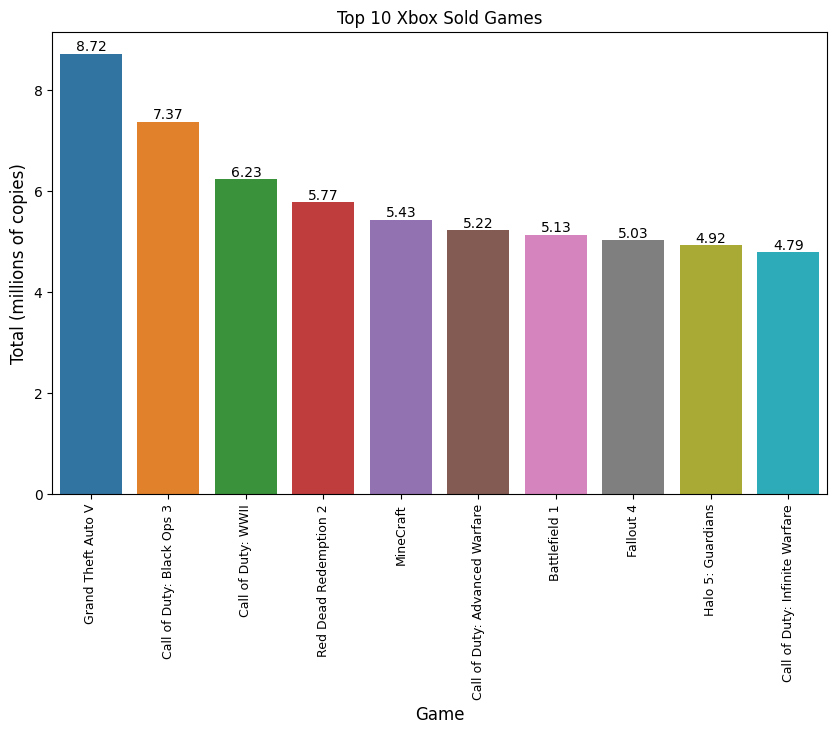

In [32]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="game",y="total",data=top10_xbox,hue="game",palette="tab10")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Top 10 Xbox Sold Games")
plt.xlabel("Game",fontsize=12)
plt.ylabel("Total (millions of copies)",fontsize=12)
plt.xticks(rotation=90,size=9)
plt.show()

#### 3.2 Top 10: PS4 selling games.

In [33]:
play

,game,year,genre,publisher,north_america,europe,japan,rest_of_world,total
0,Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1025,Biomutant,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [34]:
play_games=play.groupby(["game","year"],as_index=False).total.sum().sort_values("total",ascending=False)
play_games

,game,year,total
284,Grand Theft Auto V,2014,19.39
104,Call of Duty: Black Ops 3,2015,15.09
535,Red Dead Redemption 2,2018,13.94
108,Call of Duty: WWII,2017,13.40
230,FIFA 18,2017,11.80
...,...,...,...
339,Kingdom Hearts HD I.5 + II.5 ReMIX,2017,0.00
742,Tsuihou Senkyo,2017,0.00
77,Biomutant,2019,0.00
49,Atelier Sophie,2020,0.00


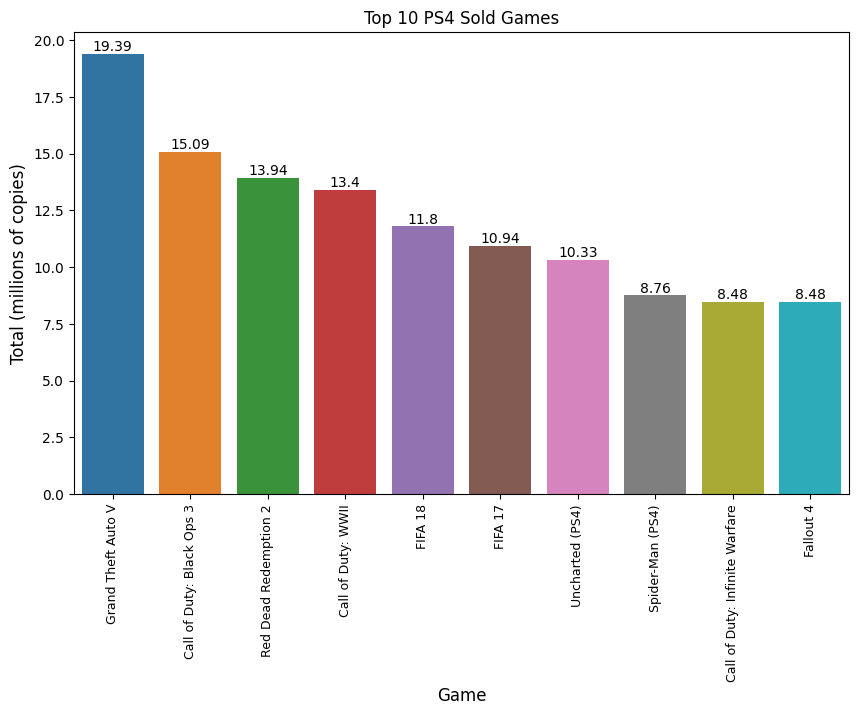

In [35]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="game",y="total",data=play_games[:10],hue="game",palette="tab10")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Top 10 PS4 Sold Games")
plt.xlabel("Game",fontsize=12)
plt.ylabel("Total (millions of copies)",fontsize=12)
plt.xticks(rotation=90,size=9)
plt.show()

#### 3.3 Most Sold games for both consoles

In [36]:
games

,game,year,genre,publisher,north_america_xbox,europe_xbox,japan_xbox,rest_of_world_xbox,north_america_ps,europe_ps,japan_ps,rest_of_world_ps,total
0,Grand Theft Auto V,2014,Action,Rockstar Games,4.70,3.25,0.01,0.76,6.06,9.71,0.60,3.02,28.11
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,4.63,2.04,0.02,0.68,6.18,6.05,0.41,2.44,22.46
2,Call of Duty: WWII,2017,Shooter,Activision,3.75,1.91,0.00,0.57,4.67,6.21,0.40,2.12,19.63
3,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.26,6.21,0.21,2.26,19.71
4,MineCraft,2014,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,1.89,3.13,0.35,0.96,11.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,Biomutant,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
448,Biomutant,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
449,de Blob,2017,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
450,Outcast: Second Contact,2017,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.01,0.06


In [37]:
top_games=games.groupby(["game","year"],as_index=False).total.sum().sort_values("total",ascending=False)
top_games

,game,year,total
157,Grand Theft Auto V,2014,28.11
63,Call of Duty: Black Ops 3,2015,22.46
304,Red Dead Redemption 2,2018,19.71
67,Call of Duty: WWII,2017,19.63
137,FIFA 18,2017,14.94
...,...,...,...
287,Professional Lumberjack 2016,2015,0.00
12,Alekhine's Gun,2016,0.00
181,Kingdom Hearts III,2019,0.00
26,Assassin's Creed: Victory,2015,0.00


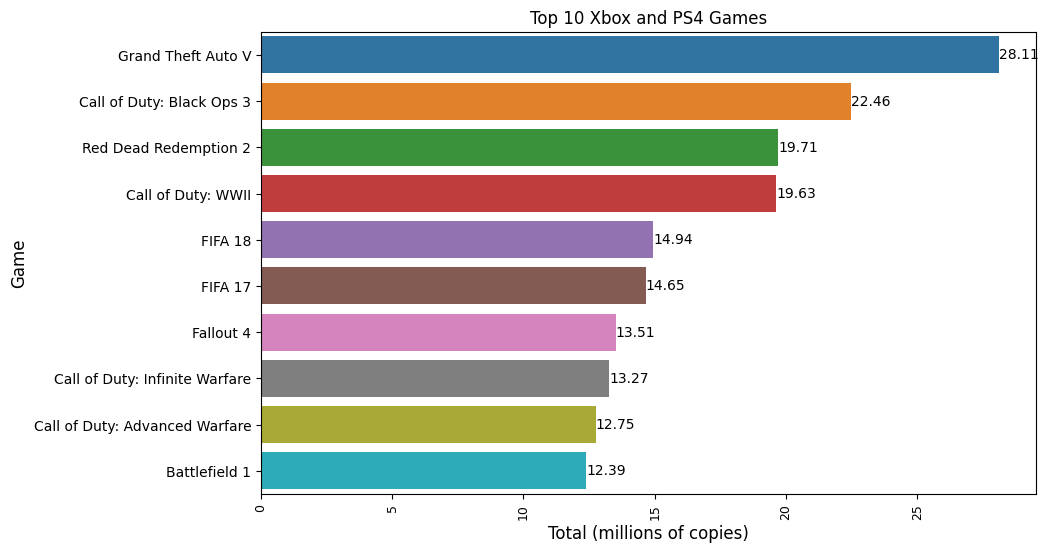

In [38]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="total",y="game",data=top_games[:10],hue="game",palette="tab10")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Top 10 Xbox and PS4 Games")
plt.xlabel("Total (millions of copies)",fontsize=12)
plt.ylabel("Game",fontsize=12)
plt.xticks(rotation=90,size=9)
plt.show()

#### 3.4 Comparision for most Sold games

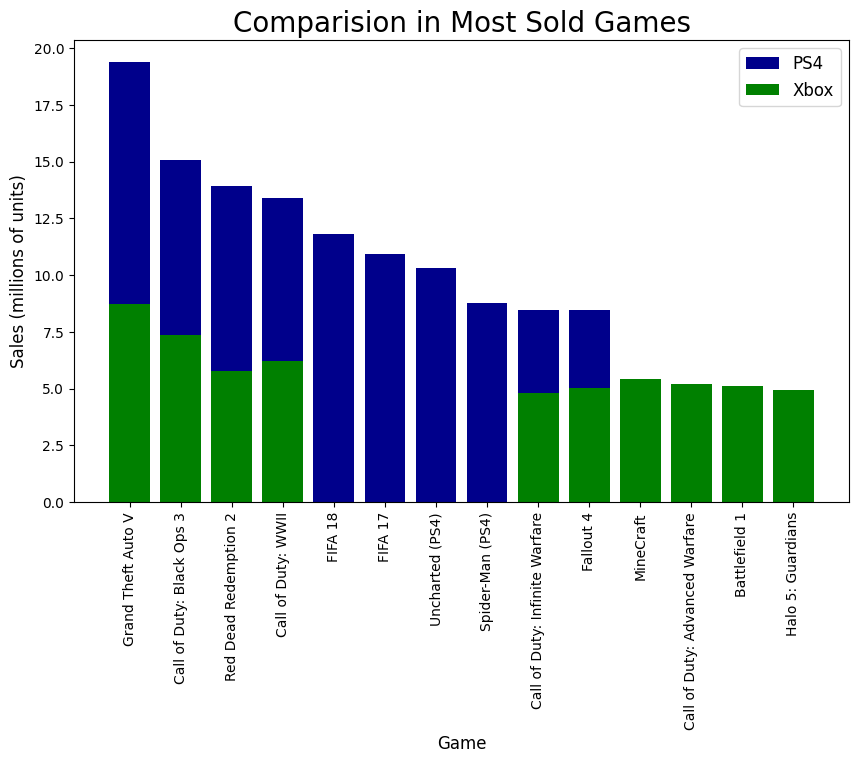

In [39]:
plt.figure(figsize=(10,6))
plt.bar(play_games["game"][:10],play_games["total"][:10],color="darkblue")
plt.bar(top10_xbox["game"],top10_xbox["total"],color="green")
plt.xticks(rotation = 90, fontsize = 10)
plt.title('Comparision in Most Sold Games', fontsize=20)
plt.ylabel('Sales (millions of units)', fontsize = 12)
plt.xlabel("Game",fontsize=12)
plt.legend(['PS4', 'Xbox'], fontsize = 12)
plt.show()

#### 3.5 Top 3 Sold games by year

In [40]:
top_games

,game,year,total
157,Grand Theft Auto V,2014,28.11
63,Call of Duty: Black Ops 3,2015,22.46
304,Red Dead Redemption 2,2018,19.71
67,Call of Duty: WWII,2017,19.63
137,FIFA 18,2017,14.94
...,...,...,...
287,Professional Lumberjack 2016,2015,0.00
12,Alekhine's Gun,2016,0.00
181,Kingdom Hearts III,2019,0.00
26,Assassin's Creed: Victory,2015,0.00


In [41]:
filter=top_games.total!=0
top_games=top_games.loc[filter]
top_games

,game,year,total
157,Grand Theft Auto V,2014,28.11
63,Call of Duty: Black Ops 3,2015,22.46
304,Red Dead Redemption 2,2018,19.71
67,Call of Duty: WWII,2017,19.63
137,FIFA 18,2017,14.94
...,...,...,...
416,Valhalla Hills,2017,0.01
143,Farming 2017 - The Simulation,2016,0.01
379,The Escapists: The Walking Dead,2015,0.01
440,Woodcutter Simulator 2016,2015,0.01


In [42]:
top3=top_games.groupby(["year","game"],as_index=False).total.sum()
top3

,year,game,total
0,2013,Angry Birds: Star Wars,0.39
1,2013,Assassin's Creed IV: Black Flag,5.51
2,2013,Battlefield 4,6.03
3,2013,Call of Duty: Ghosts,7.24
4,2013,FIFA Soccer 14,4.74
...,...,...,...
401,2018,Shaq-Fu: A Legend Reborn,0.04
402,2018,Sword Art Online: Fatal Bullet,0.39
403,2018,The Crew 2,1.15
404,2018,Vampyr,0.49


In [43]:
top3.sort_values(["year","total"],ascending=[True,False],inplace=True)
top3

,year,game,total
3,2013,Call of Duty: Ghosts,7.24
2,2013,Battlefield 4,6.03
1,2013,Assassin's Creed IV: Black Flag,5.51
4,2013,FIFA Soccer 14,4.74
6,2013,Lego Marvel Super Heroes,3.06
...,...,...,...
396,2018,Monster Energy Supercross - The Official Video...,0.19
392,2018,Extinction,0.11
389,2018,Don't Starve,0.09
399,2018,Pure Farming 2018,0.07


In [44]:
top3=top3.groupby("year").head(3)
top3

,year,game,total
3,2013,Call of Duty: Ghosts,7.24
2,2013,Battlefield 4,6.03
1,2013,Assassin's Creed IV: Black Flag,5.51
24,2014,Grand Theft Auto V,28.11
14,2014,Call of Duty: Advanced Warfare,12.75
34,2014,MineCraft,11.76
77,2015,Call of Duty: Black Ops 3,22.46
94,2015,Fallout 4,13.51
93,2015,FIFA 16,11.47
183,2016,FIFA 17,14.65


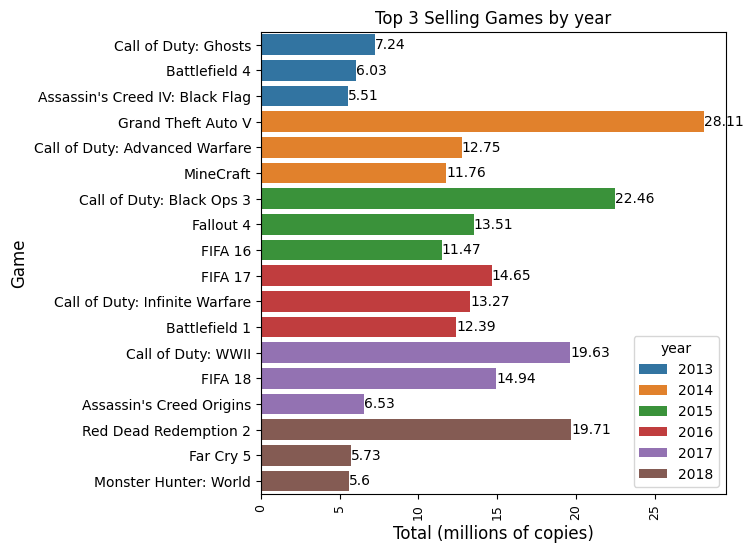

In [45]:
plt.figure(figsize=(6,6))
ax=sns.barplot(x="total",y="game",data=top3,hue="year",palette="tab10",legend=True)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Top 3 Selling Games by year")
plt.xlabel("Total (millions of copies)",fontsize=12)
plt.ylabel("Game",fontsize=12)
plt.xticks(rotation=90,size=9)
plt.show()

#### 3.6 Number of sell copies by region for both consoles

In [46]:
games

,game,year,genre,publisher,north_america_xbox,europe_xbox,japan_xbox,rest_of_world_xbox,north_america_ps,europe_ps,japan_ps,rest_of_world_ps,total
0,Grand Theft Auto V,2014,Action,Rockstar Games,4.70,3.25,0.01,0.76,6.06,9.71,0.60,3.02,28.11
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,4.63,2.04,0.02,0.68,6.18,6.05,0.41,2.44,22.46
2,Call of Duty: WWII,2017,Shooter,Activision,3.75,1.91,0.00,0.57,4.67,6.21,0.40,2.12,19.63
3,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.26,6.21,0.21,2.26,19.71
4,MineCraft,2014,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,1.89,3.13,0.35,0.96,11.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,Biomutant,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
448,Biomutant,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
449,de Blob,2017,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
450,Outcast: Second Contact,2017,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.01,0.06


In [47]:
region_games=games.copy()

In [48]:
region_games=region_games.assign(north_america=lambda x:(x["north_america_xbox"]+x["north_america_ps"]))
region_games=region_games.assign(europe=lambda x:(x["europe_xbox"]+x["europe_ps"]))
region_games=region_games.assign(japan=lambda x:(x["japan_xbox"]+x["japan_ps"]))
region_games=region_games.assign(rest_of_world=lambda x:(x["rest_of_world_xbox"]+x["rest_of_world_ps"]))
region_games

,game,year,genre,publisher,north_america_xbox,europe_xbox,japan_xbox,rest_of_world_xbox,north_america_ps,europe_ps,japan_ps,rest_of_world_ps,total,north_america,europe,japan,rest_of_world
0,Grand Theft Auto V,2014,Action,Rockstar Games,4.70,3.25,0.01,0.76,6.06,9.71,0.60,3.02,28.11,10.76,12.96,0.61,3.78
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,4.63,2.04,0.02,0.68,6.18,6.05,0.41,2.44,22.46,10.81,8.09,0.43,3.12
2,Call of Duty: WWII,2017,Shooter,Activision,3.75,1.91,0.00,0.57,4.67,6.21,0.40,2.12,19.63,8.42,8.12,0.40,2.69
3,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.26,6.21,0.21,2.26,19.71,9.02,7.68,0.21,2.80
4,MineCraft,2014,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,1.89,3.13,0.35,0.96,11.76,5.12,4.84,0.35,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,Biomutant,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
448,Biomutant,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
449,de Blob,2017,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
450,Outcast: Second Contact,2017,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.01,0.06,0.05,0.00,0.00,0.01


In [49]:
region_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   game                452 non-null    object 
 1   year                452 non-null    int32  
 2   genre               452 non-null    object 
 3   publisher           452 non-null    object 
 4   north_america_xbox  452 non-null    float64
 5   europe_xbox         452 non-null    float64
 6   japan_xbox          452 non-null    float64
 7   rest_of_world_xbox  452 non-null    float64
 8   north_america_ps    452 non-null    float64
 9   europe_ps           452 non-null    float64
 10  japan_ps            452 non-null    float64
 11  rest_of_world_ps    452 non-null    float64
 12  total               452 non-null    float64
 13  north_america       452 non-null    float64
 14  europe              452 non-null    float64
 15  japan               452 non-null    float64
 16  rest_of_

In [50]:
filtercolumns=["north_america","europe","japan","rest_of_world"]
region_games=region_games.loc[:,filtercolumns]
region_games

,north_america,europe,japan,rest_of_world
0,10.76,12.96,0.61,3.78
1,10.81,8.09,0.43,3.12
2,8.42,8.12,0.40,2.69
3,9.02,7.68,0.21,2.80
4,5.12,4.84,0.35,1.45
...,...,...,...,...
447,0.00,0.00,0.00,0.00
448,0.00,0.00,0.00,0.00
449,0.00,0.00,0.00,0.00
450,0.05,0.00,0.00,0.01


In [51]:
region_games=pd.DataFrame(region_games.sum(),columns=["total"])
region_games

,total
north_america,291.03
europe,267.04
japan,17.65
rest_of_world,89.96


In [52]:
totalregion=region_games.total.sum()
totalregion

665.6800000000001

In [53]:
region_games["market_share(%)"]=(region_games["total"]/totalregion*100).round(2)
region_games

,total,market_share(%)
north_america,291.03,43.72
europe,267.04,40.12
japan,17.65,2.65
rest_of_world,89.96,13.51


In [54]:
region_games=region_games.rename(index=({"north_america":"North America","europe":"Europe","japan":"Japan","rest_of_world":"Rest of World"}))
region_games

,total,market_share(%)
North America,291.03,43.72
Europe,267.04,40.12
Japan,17.65,2.65
Rest of World,89.96,13.51


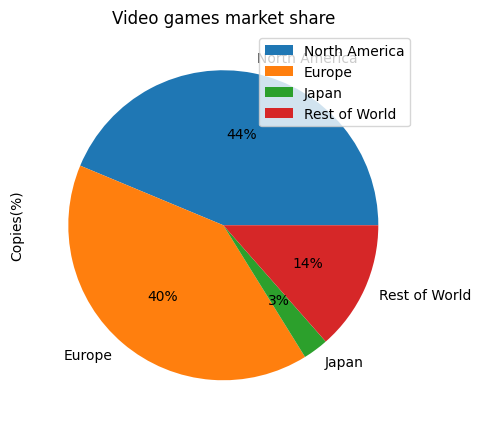

In [55]:
region_games.plot.pie(y="market_share(%)",legend=True,autopct='%1.0f%%',figsize=(5,8))
plt.ylabel("Copies(%)")
plt.title("Video games market share")
plt.show()

#### 3.7 Top 10 Video games seller publishers

In [56]:
games

,game,year,genre,publisher,north_america_xbox,europe_xbox,japan_xbox,rest_of_world_xbox,north_america_ps,europe_ps,japan_ps,rest_of_world_ps,total
0,Grand Theft Auto V,2014,Action,Rockstar Games,4.70,3.25,0.01,0.76,6.06,9.71,0.60,3.02,28.11
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,4.63,2.04,0.02,0.68,6.18,6.05,0.41,2.44,22.46
2,Call of Duty: WWII,2017,Shooter,Activision,3.75,1.91,0.00,0.57,4.67,6.21,0.40,2.12,19.63
3,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.26,6.21,0.21,2.26,19.71
4,MineCraft,2014,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,1.89,3.13,0.35,0.96,11.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,Biomutant,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
448,Biomutant,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
449,de Blob,2017,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
450,Outcast: Second Contact,2017,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.01,0.06


In [57]:
publisher=games.groupby(["publisher"],as_index=False).total.sum()
publisher

,publisher,total
0,2K Games,12.01
1,2K Sports,27.78
2,505 Games,6.72
3,5pb,0.02
4,Activision,105.63
...,...,...
85,Unknown,0.00
86,Versus Evil,0.00
87,Warner Bros. Interactive Entertainment,48.37
88,Wired Productions,0.07


In [58]:
filter=publisher.total!=0
publisher=publisher.loc[filter]
publisher

,publisher,total
0,2K Games,12.01
1,2K Sports,27.78
2,505 Games,6.72
3,5pb,0.02
4,Activision,105.63
...,...,...
83,UIG Entertainment,0.01
84,Ubisoft,89.72
87,Warner Bros. Interactive Entertainment,48.37
88,Wired Productions,0.07


In [59]:
# Top 10 publishers

publisher=publisher.sort_values("total",ascending=False)
publisher

,publisher,total
4,Activision,105.63
84,Ubisoft,89.72
22,EA Sports,70.24
23,Electronic Arts,70.04
64,Rockstar Games,48.67
...,...,...
51,Moss,0.03
3,5pb,0.02
76,Team17 Software,0.01
80,TopWare Interactive,0.01


In [60]:
publisher["publisher"]=publisher["publisher"].replace({"Warner Bros. Interactive Entertainment":"Warner Bros"})

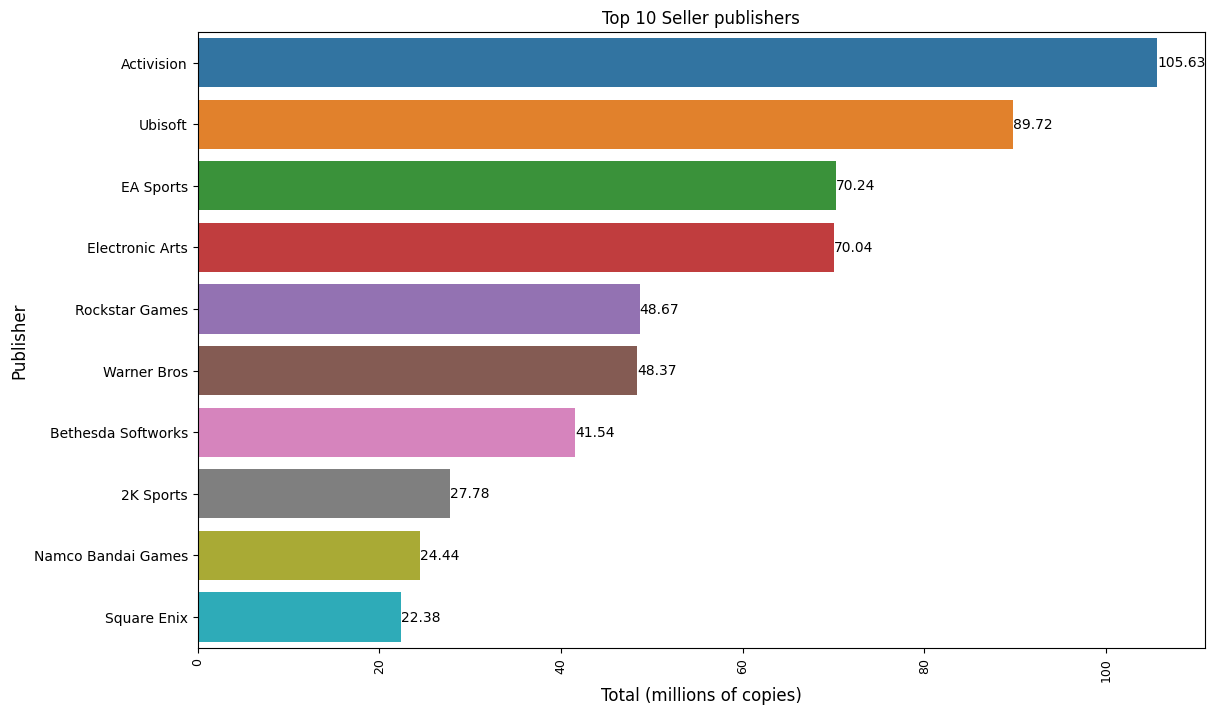

In [61]:
plt.figure(figsize=(13,8))
ax=sns.barplot(x="total",y="publisher",data=publisher[:10],hue="publisher",palette="tab10")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Top 10 Seller publishers")
plt.xlabel("Total (millions of copies)",fontsize=12)
plt.ylabel("Publisher",fontsize=12)
plt.xticks(rotation=90,size=9)
plt.show()

### To Looker Studio!

#### Video Games Sales Report [Link](https://lookerstudio.google.com/reporting/27a8e307-fa15-4b3d-9a15-5ad9cde05bb2)
